In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Importing the dataset.
dataset=pd.read_csv("Titanic-Dataset.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Checking for Null Values.
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Handling null values
dataset['Age'] = dataset['Age'].replace(np.NaN,dataset['Age'].median())

dataset = dataset.drop(['Cabin'], axis=1)

dataset.dropna(subset=['Embarked'],how='any',inplace=True)

In [6]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<ipython-input-7-af9811d18692>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


<Axes: >

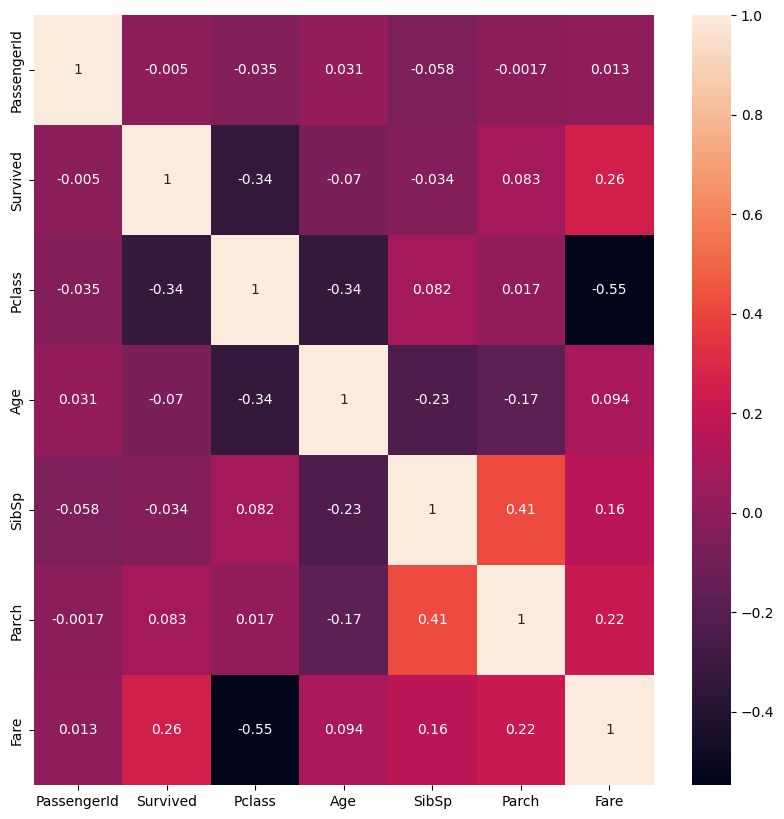

In [7]:
# Data Visualization.
# Heatmap
corr=dataset.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

<Axes: title={'center': 'Fare range vs Survived passengers'}, xlabel='Fare_Range', ylabel='Survived'>

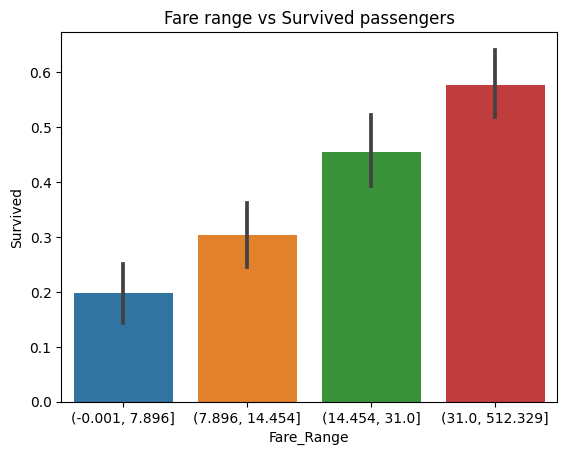

In [8]:
#Barplot
dataset['Fare_Range'] = pd.qcut(dataset['Fare'], 4)
plt.title('Fare range vs Survived passengers')
sns.barplot(x ='Fare_Range', y ='Survived', data = dataset)

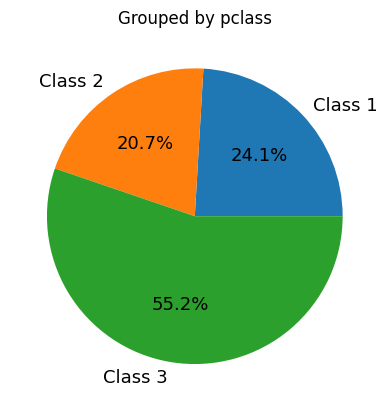

In [9]:
#Piechart
pclass_count = dataset.groupby('Pclass')['Pclass'].count()
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'],  autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

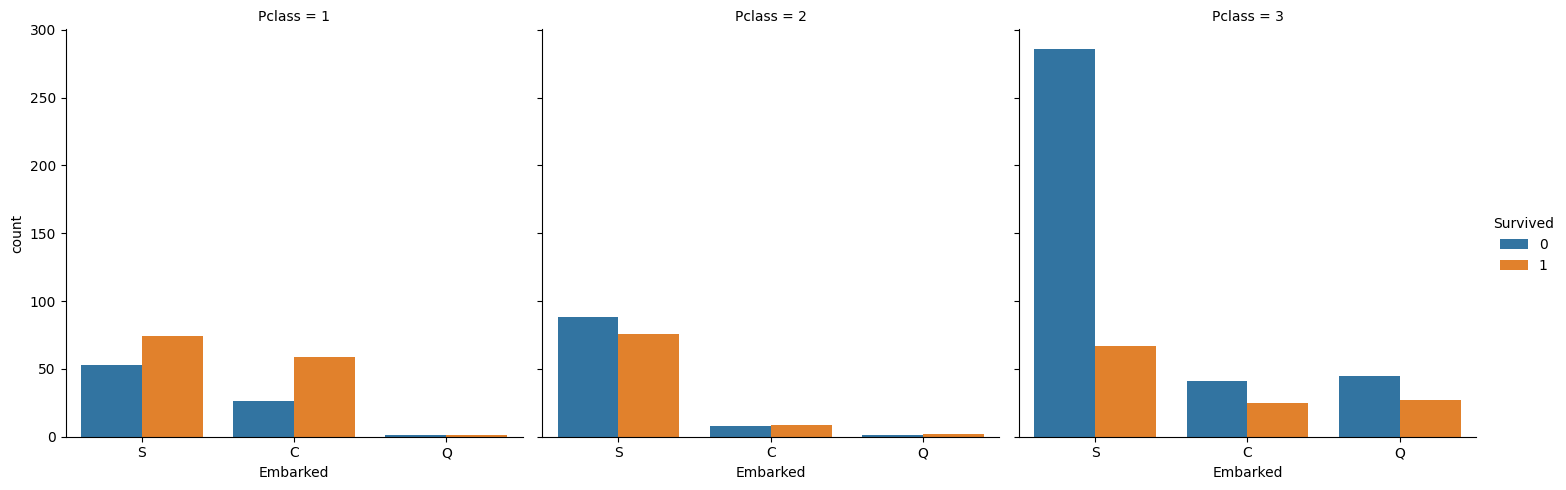

In [11]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = dataset)

<Axes: >

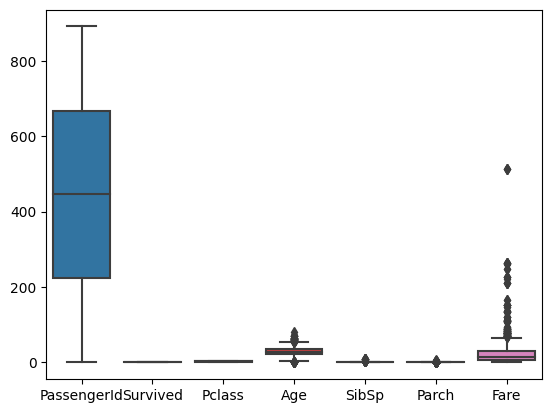

In [12]:
# Outlier Detection
sns.boxplot(dataset)

Text(0.5, 0, 'Fare')

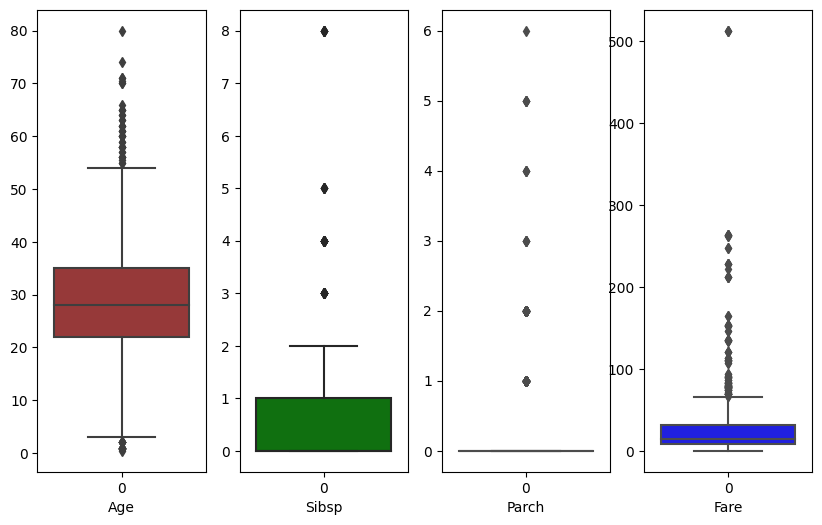

In [13]:
# Outliers are present in Age, SibSp, Parch, Fare classes
fig, ax = plt.subplots(1, 4, figsize=(10, 6))

sns.boxplot(data=dataset['Age'], ax=ax[0], color='brown')
ax[0].set_xlabel('Age')

sns.boxplot(data=dataset['SibSp'], ax=ax[1], color='green')
ax[1].set_xlabel('Sibsp')

sns.boxplot(data=dataset['Parch'], ax=ax[2], color='yellow')
ax[2].set_xlabel('Parch')

sns.boxplot(data=dataset['Fare'], ax=ax[3], color='blue')
ax[3].set_xlabel('Fare')

Splitting Dependent and Independent variables

In [14]:
# Independent variables - Name, SibSp, Parch, Ticket
x = dataset.drop(['Name','SibSp','Parch','Ticket'],axis=1)
y = dataset['Survived']

In [15]:
# Perform Encoding
# Performing label encoding for Sex and Embarked columns
encoder = LabelEncoder()
x['Sex'] = encoder.fit_transform(x['Sex'])
x['Embarked'] = encoder.fit_transform(x['Embarked'])

In [16]:
x.head()   # Values in Sex and Embarked columns into numerical values

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_Range
0,1,0,3,1,22.0,7.2500,2,"(-0.001, 7.896]"
1,2,1,1,0,38.0,71.2833,0,"(31.0, 512.329]"
2,3,1,3,0,26.0,7.9250,2,"(7.896, 14.454]"
3,4,1,1,0,35.0,53.1000,2,"(31.0, 512.329]"
4,5,0,3,1,35.0,8.0500,2,"(7.896, 14.454]"


In [17]:
x=x.drop(['Fare_Range'],axis=1)
# Feature Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
x_scaled

array([[-1.73250451, -0.78696114,  0.82520863, ..., -0.56367407,
        -0.50023975,  0.58683958],
       [-1.72861124,  1.27071078, -1.57221121, ...,  0.66921696,
         0.78894661, -1.93955453],
       [-1.72471797,  1.27071078,  0.82520863, ..., -0.25545131,
        -0.48664993,  0.58683958],
       ...,
       [ 1.72471797, -0.78696114,  0.82520863, ..., -0.10133993,
        -0.17408416,  0.58683958],
       [ 1.72861124,  1.27071078, -1.57221121, ..., -0.25545131,
        -0.0422126 , -1.93955453],
       [ 1.73250451, -0.78696114,  0.82520863, ...,  0.20688282,
        -0.49017322, -0.67635748]])

In [19]:
# Splitting Data into Train and Test
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [20]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (622, 7)
Shape of x_test: (267, 7)
Shape of y_train: (622,)
Shape of y_test: (267,)
